<a href="https://colab.research.google.com/github/owilli38/DSBA-6162/blob/main/DSBA6162%2C_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("AdultUCI.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [ ]:
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() > 32:
        df.drop(col, axis=1, inplace=True)
display(df.head())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,small


In [ ]:
df.dropna(inplace=True)

In [ ]:
x = df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]
x.columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
display(x.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
y = df['income']
display(y.head())

,income
0,small
1,small
2,small
3,small
4,small


In [ ]:
# normalize each variable to have mean=0 and sd=1 -- z score normalization
clusterdata=x.copy()
for i in range(clusterdata.shape[1]):
    clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])

/tmp/ipython-input-604144298.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.04241621  0.88095778 -0.03381484 ...  1.4908062  -1.25351168
  1.03341989]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])
/tmp/ipython-input-604144298.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.06517328 -1.01022176  0.24465473 ... -0.35972663  0.11041941
  0.93006469]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  clusterdata.iloc[:,i] = preprocessing.scale(clusterdata.iloc[:,i])
/tmp/ipython-input-604144298.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.11990925  1.11990925 -0.44111092 ... -0.44111092 -0.44111092
 -0.

In [ ]:
clusterdata.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.042416,-1.065173,1.119909,0.142438,-0.219179,-0.079207
1,0.880958,-1.010222,1.119909,-0.147516,-0.219179,-2.331988
2,-0.033815,0.244655,-0.441111,-0.147516,-0.219179,-0.079207
3,1.109651,0.425535,-1.221621,-0.147516,-0.219179,-0.079207
4,-0.796125,1.408764,1.119909,-0.147516,-0.219179,-0.079207


In [ ]:
x.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [ ]:
# k-means cluster analysis for 1-10 clusters
from scipy.spatial.distance import cdist
clusters=range(1,11) #range(1,n) generates numbers from 1 to n-1
sumdist=[]

#Perform k-means analysis, as well as check the sum of the within cluster distances vs. different k values
# "for" makes a looped cycle
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clusterdata)
    clusassign=model.predict(clusterdata)
    sumdist.append(sum(np.min(cdist(clusterdata, model.cluster_centers_, 'euclidean'), axis=1))
    #scipy.spatial.distance.cdist() is a function in Python that calculates pairwise distances between two sets of points. It’s useful in clustering. axis = 1 means calculating the minimum value row-wise.
    )

    #np.min gives minimum value row wise

In [ ]:
model.cluster_centers_

array([[-4.37159172e-02, -3.46413698e-01,  1.25761585e+00,
         2.47385953e-02, -2.16879594e-01,  1.72842021e-01],
       [-5.88591876e-01, -3.55885210e-01, -3.30503083e-01,
        -1.07942790e-01, -2.18366462e-01,  2.89596520e-02],
       [ 2.41579864e-01, -4.33074590e-02,  3.46519605e-01,
        -1.47516036e-01,  4.46509739e+00,  2.30824632e-01],
       [ 6.23324267e-01,  4.03249945e-02, -2.22557296e+00,
        -1.18953479e-01, -2.16962308e-01, -1.58091604e-01],
       [ 5.90296159e-01,  2.29809543e-02,  1.10983815e+00,
         1.31897006e+01, -2.19179302e-01,  7.59462480e-01],
       [-7.26150647e-01,  2.00961329e+00, -2.35964228e-01,
        -1.07782521e-01, -2.16392492e-01, -8.49311575e-02],
       [ 6.04126345e-01,  1.09721134e+00,  3.05192356e-01,
        -1.04460979e-02, -2.14911279e-01,  1.07220847e-01],
       [ 1.32933206e+00, -4.47168276e-01, -1.35524896e-01,
        -4.64057247e-02, -2.16169463e-01, -3.08809496e-01],
       [ 1.40119303e-01, -2.95215030e-01,  1.430

In [ ]:
sumdist #list of elements for sum of k elements (approximation for E, the cost function)

[np.float64(62956.73291264725),
 np.float64(58249.348113083615),
 np.float64(52817.34926414169),
 np.float64(51638.31825054385),
 np.float64(48709.99039367379),
 np.float64(44572.68266676758),
 np.float64(42906.22084005546),
 np.float64(39617.34047135813),
 np.float64(38459.624396020794),
 np.float64(37497.03182297268)]

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

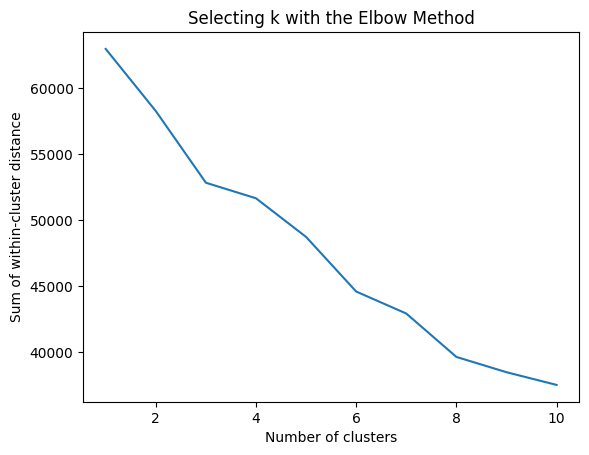

In [ ]:
%matplotlib inline
plt.plot(clusters, sumdist)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of within-cluster distance')
plt.title('Selecting k with the Elbow Method')

In [ ]:
# K Means Cluster choosing 3 as the number of clusters
model = KMeans(n_clusters=2)
model.fit(clusterdata)

KMeans(n_clusters=2)

In [ ]:
model.labels_ # model lables, not ground truth

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

ground_truth,large,small
cluster,,
0,6895,22395
1,755,673


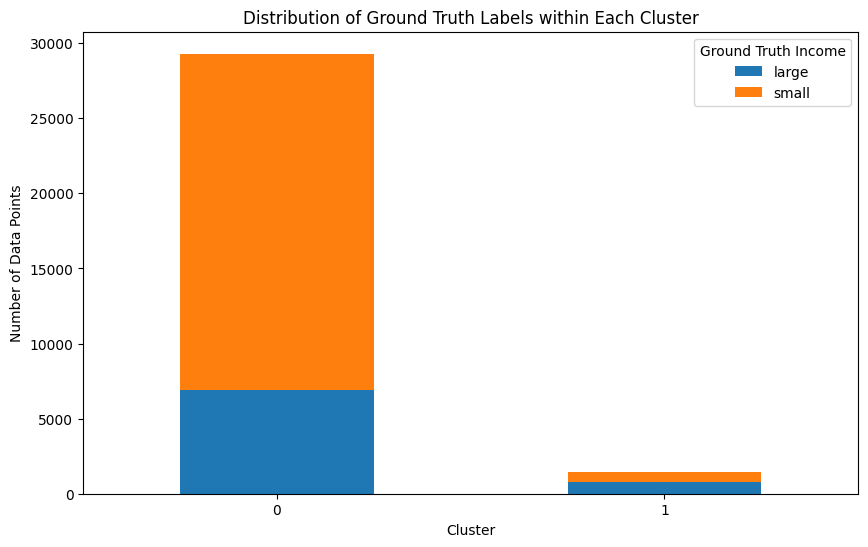

In [ ]:
# Create a new DataFrame with cluster labels and ground truth labels
results = pd.DataFrame({'cluster': model.labels_, 'ground_truth': y})

# Count the occurrences of each ground truth label within each cluster
cluster_ground_truth_counts = results.groupby(['cluster', 'ground_truth']).size().unstack(fill_value=0)

display(cluster_ground_truth_counts)

# Plot the counts
cluster_ground_truth_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Ground Truth Labels within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.legend(title='Ground Truth Income')
plt.show()

In [ ]:
# The meanings of "0", "1" in the ground truth label are different from those generated by model. We need to make them consistent.
# Create predY as a pandas Series with the same index as y
predY = pd.Series(np.choose(model.labels_, [0,1]).astype(np.int64), index=y.index)
print(f"Type of predY: {type(predY)}")
print(f"Index of predY: {predY.index}")

Type of predY: <class 'pandas.core.series.Series'>
Index of predY: Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559, 32560],
      dtype='int64', length=30718)


In [ ]:
# Performance Measures
import sklearn.metrics
# Map the numerical predictions to string labels to match the ground truth
# Ensure predY_labels is a Series with the same index as predY (which now has the same index as y)
predY_labels = pd.Series(np.array(['small', 'large'])[predY], index=predY.index)
print(f"Type of predY_labels: {type(predY_labels)}")
print(f"Index of predY_labels: {predY_labels.index}")


# Remove rows with NaN values in y
valid_indices = y.dropna().index
y_cleaned = y.loc[valid_indices]
predY_labels_cleaned = predY_labels.loc[valid_indices]

# Print data types for debugging
print(f"Data type of y_cleaned: {y_cleaned.dtype}")
print(f"Data type of predY_labels_cleaned: {predY_labels_cleaned.dtype}")

sklearn.metrics.confusion_matrix(y_cleaned, predY_labels_cleaned)

Type of predY_labels: <class 'pandas.core.series.Series'>
Index of predY_labels: Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559, 32560],
      dtype='int64', length=30718)
Data type of y_cleaned: object
Data type of predY_labels_cleaned: object


array([[  755,  6895],
       [  673, 22395]])

In [ ]:
sklearn.metrics.accuracy_score(y_cleaned, predY_labels_cleaned)

0.7536297936063546